In [1]:
try(source("../startup.R"))
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lecture 01: Getting to know ``ggplot``

**Slides for today's lecture:** ``https://git.io/vNIp1``

**Goals for today's lecture:**

* [Get started with visualization](#Getting-Started) using the ``ggplot2`` package
* Learn what [aesthetic mappings](#Aesthetic-Mappings) are and how they work

Data visualization is an important skill to have for a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the R language, we will explore the visualization tools provided by the R language and packages. Even if we restrict ourselves to R, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).


Let us start by revisiting the **mpg** data set that we saw in the last lecture.

Recall the **mpg** data frame.

In [2]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model   displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>   <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4       1.80  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4       1.80  1999     4 manual… f        21    29 p     comp…
 3 audi         a4       2.00  2008     4 manual… f        20    31 p     comp…
 4 audi         a4       2.00  2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4       2.80  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4       2.80  1999     6 manual… f        18    26 p     comp…
 7 audi         a4       3.10  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 qua…  1.80  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 qua…  1.80  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 qua…  2.00  2008     4 manual… 4        20    28 p     comp…
# ... with 224 more

A fundamental type of plot is a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). It can be used to examine the relationship between 2 variables. Cartesian coordinates are used with one variable plotted along the x-axis and the other plotted along the y-axis. Let us create a scatter plot of the engine displacement **displ** (in liters) versus the highway mileage **hwy** (in mpg).

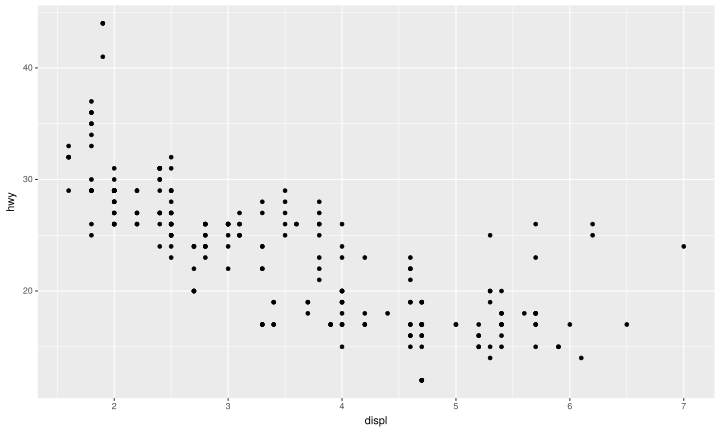

In [3]:
ggplot(data = mpg) + # engine displayment vs. highway gas mileage
  geom_point(mapping = aes(x = displ, y = hwy))

As we would expecte, there seems to be a trend whereby bigger engines (larger displacment) gets worse gas mileage. Let's check this by adding a smoothed line-of-best-fit to the plot. 

To save myself some typing I'll move the aesthetic into the main ``ggplot()`` command -- this makes it the default aesthetic for every ``geom()``, a.k.a. the **global aesthetic**.

`geom_smooth()` using method = 'loess'


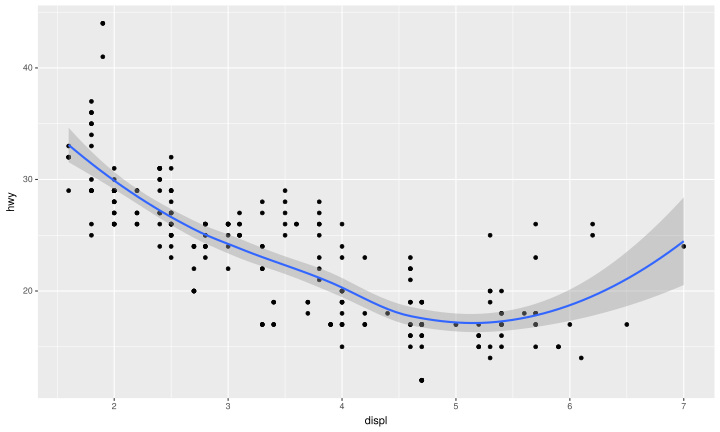

In [4]:
ggplot(data = mpg, aes(x=displ, y=hwy)) + # engine displayment vs. highway gas mileage
  geom_point() + geom_smooth() # add a line of best fit

Sure enough, there's a declining relationship up to about 5L engine displacement. The uptick seems to be driven by small cloud of outlying points which get 23-26mpg and have an engine displacement of 5-7L. To figure out what these are, we can filter the data by these criteria:

In [23]:
mpg %>% filter(between(hwy, 23, 26) & displ > 5) %>% select(class)
table(mpg$class)

class
2seater
2seater
2seater
2seater
2seater
midsize



   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

It would be helpful to somehow visualize the class of the auto alongside the data on mileage and displacement. To add this information in to the plot, we'll add another aesthetic called ``color=``:

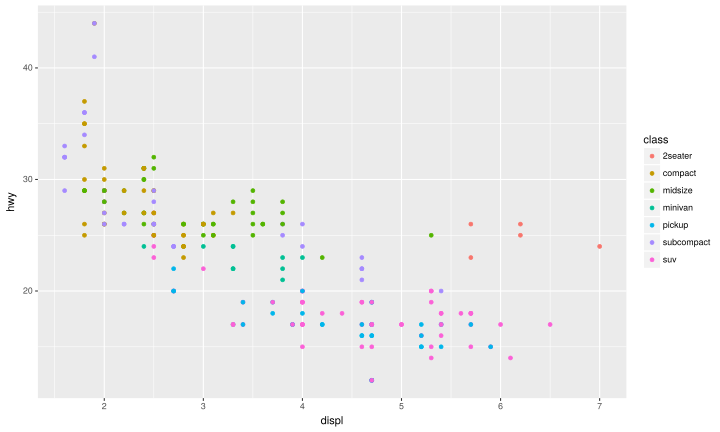

In [6]:
ggplot(data = mpg, aes(x=displ, y=hwy, color=class)) + geom_point()

Note what ggplot did for us. It chose a unique value of **color** for a unique value of **class** and also displayed a legend explaining the choices.

This confirms our hypothesis, although maybe like me you were expected the outliers to be some sort of hybrid. Let us see how the line of best fit looks if we drop the outlying ``class=='2seater'``:

`geom_smooth()` using method = 'loess'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 4.008”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.708”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.25”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 4.008”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.708”Warning message in predLoess(object$y, object$x, newx =

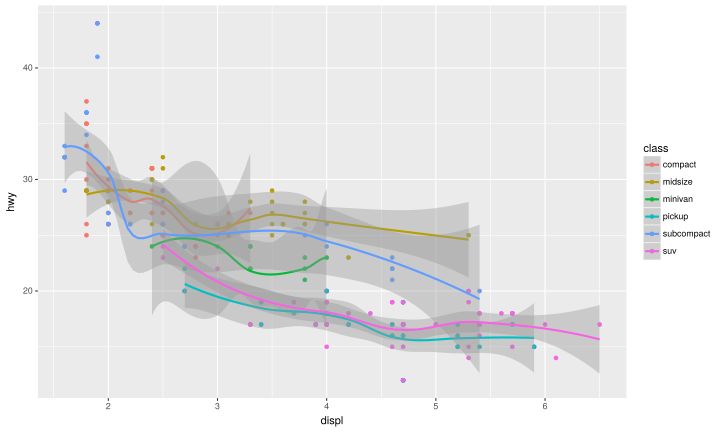

In [24]:
ggplot(data=filter(mpg, class!='2seater'), aes(x=displ, y=hwy, color=class)) + 
    geom_point() + geom_smooth()

Whoops. What happened here is that adding a factor to the ``color=`` aesthetic told ``ggplot`` to make a new color of line for each different class. With more data this could be interesting, but since we have so few examples in each class, there's not really any point in smoothing over them individually. What we really want are the points to be colored, but just one line plotted. We can achieve this my moving the ``color=`` option into the aesthetic for the ``geom_point()``:

`geom_smooth()` using method = 'loess'


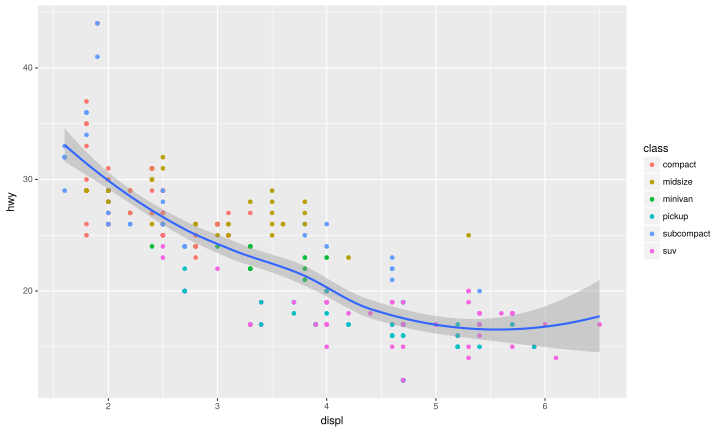

In [8]:
ggplot(data=filter(mpg, class!='2seater'), aes(x=displ, y=hwy)) + 
    geom_point(aes(color=class)) + geom_smooth() # move the color= option into geom_point to avoid clutter

Alternative, if we wanted to fit the line for only one class of cars, say ``subcompact``, we pass a filtered dataset
to the ``geom_smooth`` command:

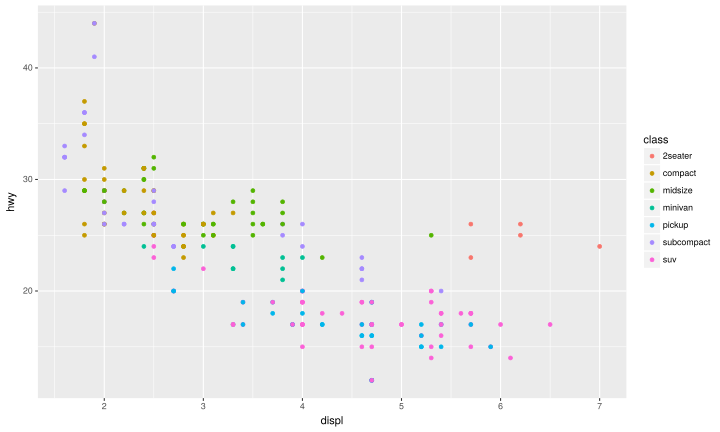

In [34]:
ggplot(data=mpg, aes(x=displ, y=hwy)) +  # subsetted geom_smooth
    geom_point(aes(color=class)) # + 
    #geom_smooth(data=filter(mpg, class=="suv"), se=T)

# Aesthetic Mappings
What you have just seen are examples of how to manipulate **aes**thetic mappings. Let us pay close attention to the syntax here. It has the form:

```r
ggplot(data = <DATA>, aes=(<MAPPINGS>)) +
    <GEOM_FUNCTION>(data = <OTHER DATA>, mapping = aes(<OTHER MAPPINGS>))
```

An important point is that the ``data=`` and ``mapping=`` parameters given to ``ggplot()`` will be the defaults
for all the other geoms, *unless* you override them by specifying individual values at each level.

Other aesthetic mappings that we can manipulate include shape, size, and transparency.

Let's try mapping the **class** variable to the **shape** aesthetic.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

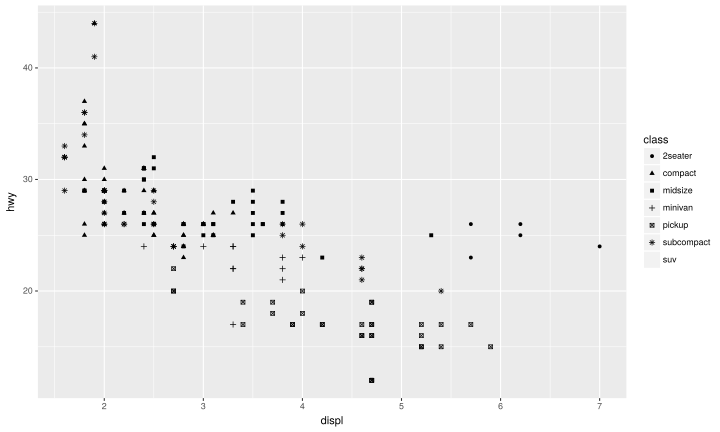

In [38]:
ggplot(data = mpg) +  # classes to shapes
    geom_point(mapping = aes(x = displ, y = hwy, shape = class))

We get a warning since, by default, only 6 shapes are used at a time but the **class** variable takes 7 values. In our case, points with SUV class went unplotted.

If we try to map a categorical variable **class** to a continuous aesthetic **size**, we get a warning. This is because there is no natural way to assign sizes to categorical variables. Instead, ``ggplot`` randomly assigns unique integers to each class.

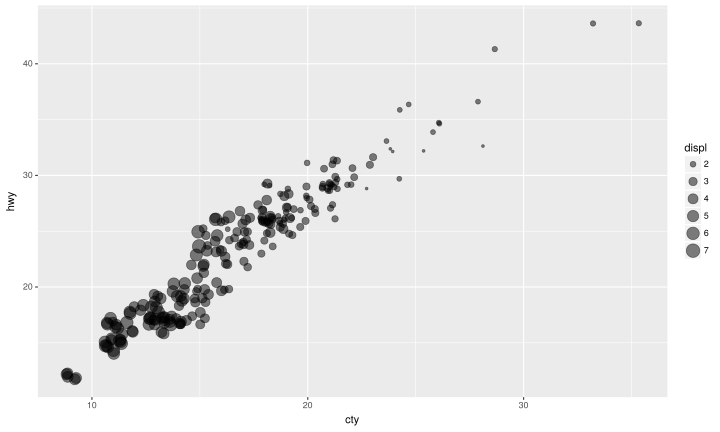

In [46]:
ggplot(data = mpg) +  # warning: mapping discrete variable to size
    geom_jitter(mapping = aes(x = cty, y = hwy, size = displ), alpha=0.5)

It makes more sense to map a continuous variable like **cty** (city mileage) to a continuous aesthetic **size**.

Warning message:
“Ignoring unknown parameters: jitter”

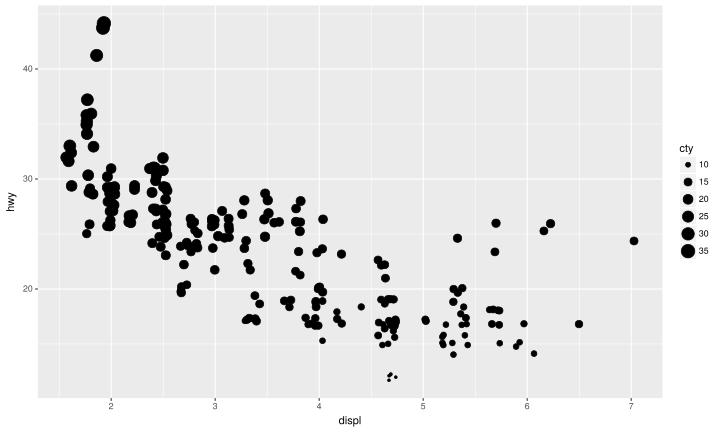

In [48]:
ggplot(data = mpg) +  # sized by city gas mileage
    geom_jitter(mapping = aes(x = displ, y = hwy, size = cty))

As expected, higher gas mileage on the hwy seems to be quite correlated with higher city mileage.

**color** is an interesting aesthetic. It works even when we map a continuous variable to it but it works differently for continuous and categorical variables.

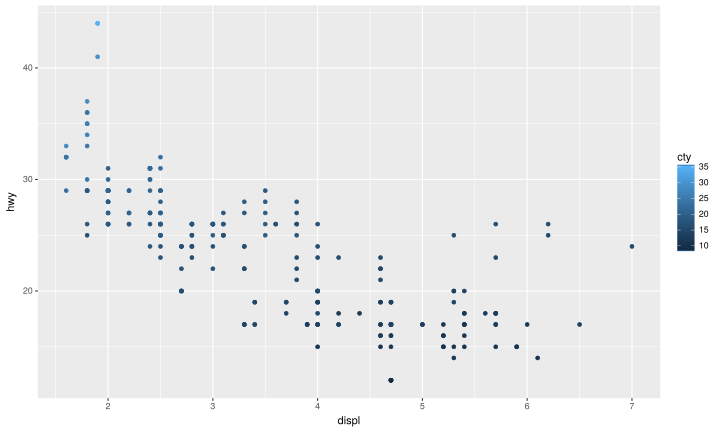

In [13]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = cty))

An aesthetic need not be mapped directly to a variable. For example, we can map the color aesthetic to TRUE/FALSE depending on whether the **year** variable has a value less than 2000 or not.

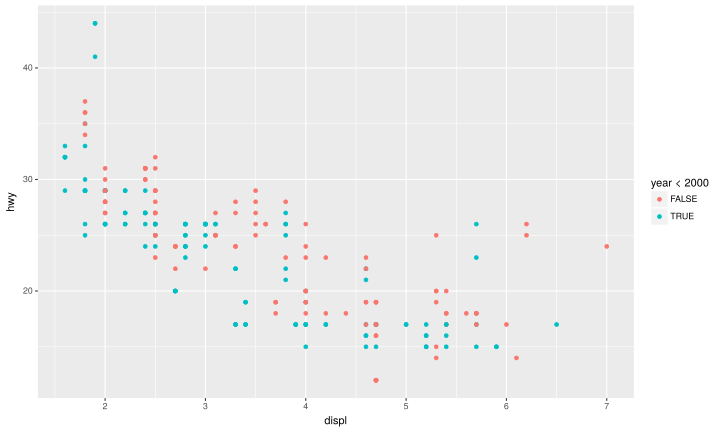

In [51]:
ggplot(data = mpg) +  # older cars get worse mileage
    geom_point(mapping = aes(x = displ, y = hwy, color = year < 2000))

Inspired by this plot, perhaps we want to plot **year** against mileage. Your first inclination might be to replace **displ** with **year** in the above plot:

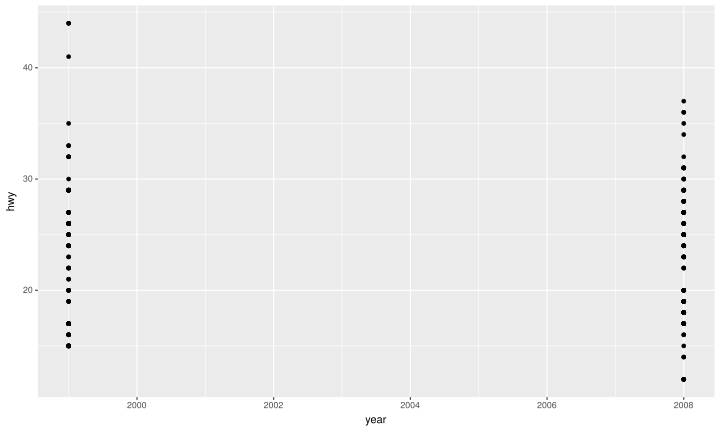

In [15]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_point(mapping = aes(x = year, y = hwy))

It turns out that there are only two years represented in the data, not really enought to paint a full picture over time. Instead we can treat year as a categorical variable and look at the distribution of **hwy** within each value of year. For this we will use a new geom called ``boxplot``:

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

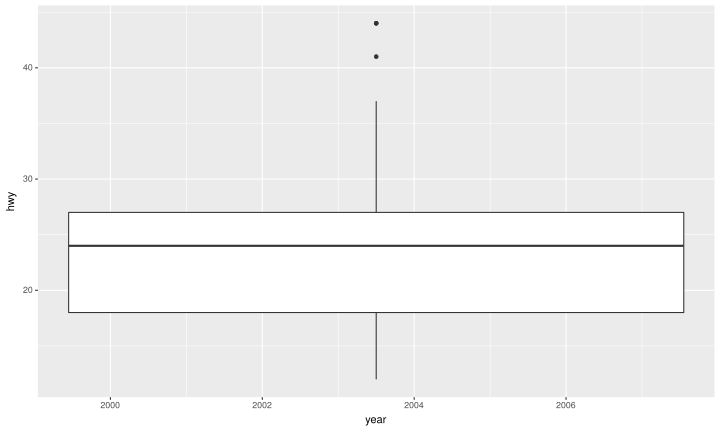

In [52]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_boxplot(mapping = aes(x=year, y=hwy))

This doesn't quite do what we want. Just like the warning message says, the problem is that the **year** variable is continuous. However since we have only a few different values of year in our data set, we need to tell R that we want to temporarily think of it as discrete. The way to do this is by converting **year** to a factor:

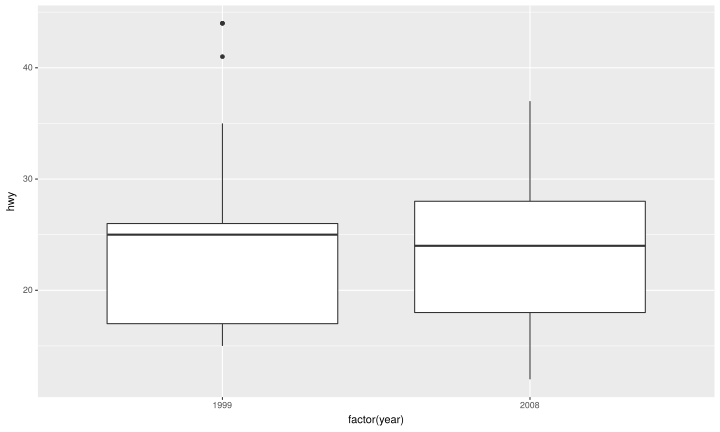

In [17]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_boxplot(mapping = aes(x=factor(year), y=hwy))  # convert year to factor

Surprisingly, the median highway gas mileage went down from 1999 to 2008. Why might this be? Let's try plotting the fraction of car types represented in each data set.

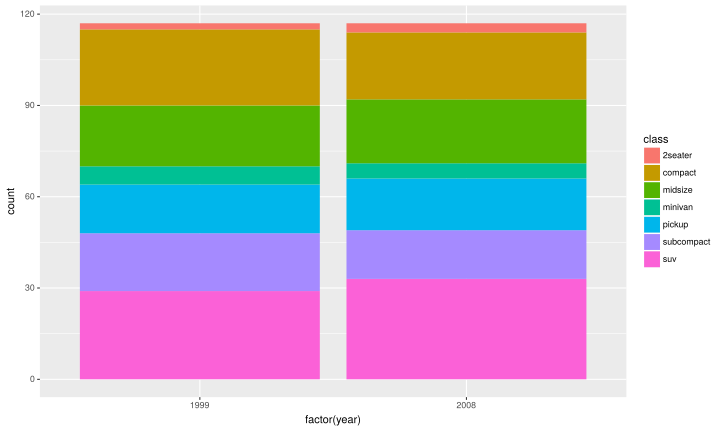

In [56]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_bar(mapping = aes(x=factor(year), fill=class))  # convert year to factor

Here I have introduced a new geom, ``geom_bar()``. It makes bar plots like the one shown above. To get the different car classes to stack within each level of year, I set the ``fill=`` aesthetic so that each class would get its own color. We will discuss ``geom_bar()`` more in the next lecture when we talk about position adjustments.

## Other geoms
There are many other geoms in ``ggplot()`` (over 30). We will not have time to go over them all. If you want to learn about other types of plots and geoms, check out this [graphical glossary](https://www.r-graph-gallery.com/portfolio/ggplot2-package/). The nice thing about plotting using ``ggplot`` is that can completely alter the type and appearance of your plot by simply switching to another type of geom.

The list of available aesthetic mappings can vary from geom to geom. 

`geom_point` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `shape`
* `size`
* `stroke`

`geom_smooth` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `linetype`
* `size`
* `weight`
* `ymax`
* `ymin`

## Getting help
We won't have time to cover all of these. Fortunately, R has very comprehensive built-in help system that can tell you more abouth what each of these options does. The syntax for accessing it is:
```{r}
?command_name
```

In [58]:
?geom_smooth # (to be run in lecture)

Let us map the **linetype** aesthetic to the **drv** variable. We'll get a different line type (dashed, dotted, solid, etc.) for each type of drivetrain:

`geom_smooth()` using method = 'loess'


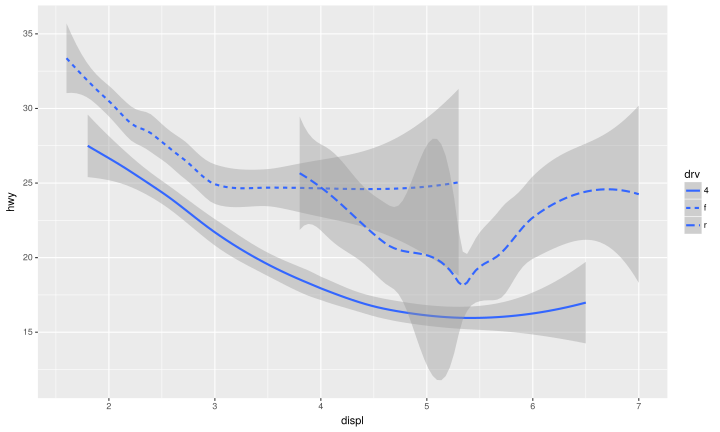

In [61]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

## The group aesthetic
The aesthetic **group** needs some explanation. Note that in `geom_point`, individual rows of our data set get plotted individually as points. In contrast, in `geom_smooth` the individual rows are not plotted separately. Instead, the geometric object created by `geom_smooth` corresponds to multiple rows of data.

`geom_smooth()` using method = 'loess'


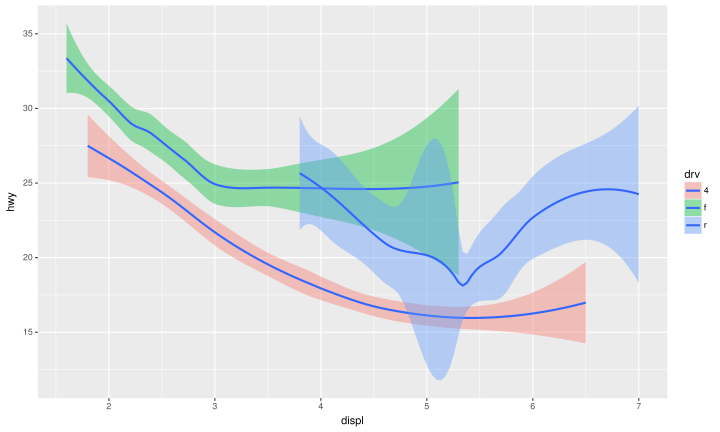

In [67]:
ggplot(data = mpg) +  # different groups, same linetype
  geom_smooth(mapping = aes(x = displ, y = hwy, fill=drv))

Contrast the above plot with the plot we get when we map the **color** aesthetic to the **drv** variable.

# Facets
We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to add a third variable.

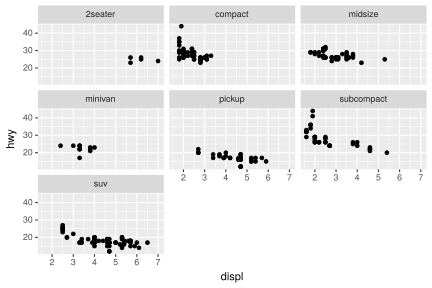

In [36]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class) # The ~ operator creates an R formula

The ``facet_wrap()`` command here told ggplot to generate a separate plot for each level of the discrete variable **class**. It also went ahead and arranged them into a nice 3x3 grid format.

The syntax to facet may look a little funny: 
```{r}
facet_wrap(~ class)
```
The tilde (``~``) at the beginning denotes what is called a **formula** in R. We will discuss formulas later in the class when we talk about modeling. For now, just keep in mind that the facet command must be written just so for things to work:

In [37]:
print(try(
  ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy)) + 
    facet_wrap(class))) # no ~ means error

[1] "Error in UseMethod(\"as.quoted\") : \n  no applicable method for 'as.quoted' applied to an object of class \"function\"\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in UseMethod("as.quoted"): no applicable method for 'as.quoted' applied to an object of class "function">


You should facet on a discrete variable. If you facet on a continuous variable, e.g., **cty**, R will discretize it first.

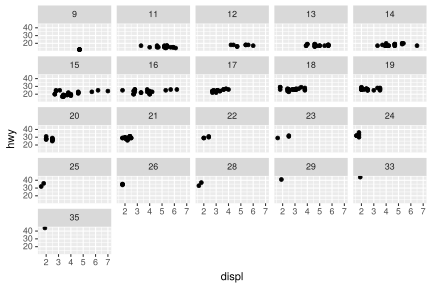

In [5]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ cty) 

You can facet on a combination of variables by modifying the formula to include more variables.

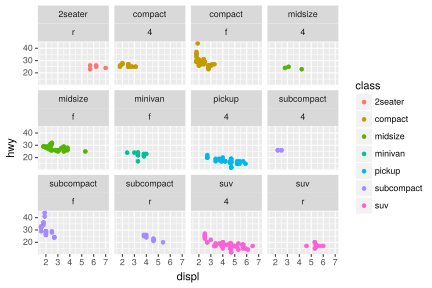

In [42]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=class)) +
  facet_wrap(~ class + drv) # The ~ operator creates an R formula

There is another way to facet on two variables: use a 2D grid. Now we make use of an expanded formula notation, by placing the variable we want faceted along the y-axis on the left hand side of the ``~`` and the horizontal faceting variable on the RHS of ``~``:

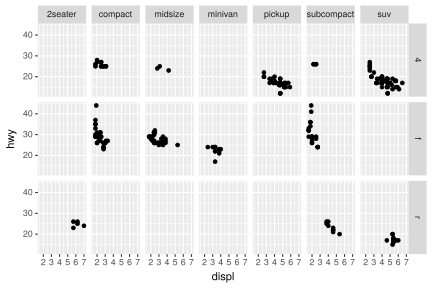

In [43]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ class) # Now we use a 2-sided formula of the form Y ~ X 

Here we used a different command called ``facet_grid()``. The difference between ``facet_grid()`` and ``facet_wrap()`` is that ``facet_grid`` places the plots on a grid according to the provided formula. ``facet_wrap`` stacks the variables and chooses its own grid:

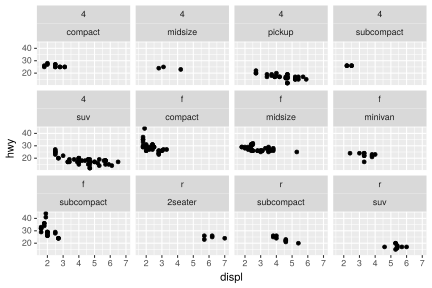

In [44]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(drv ~ class) # facet_wrap instead of facet_grid
# no different from facet_wrap(~ drv + class)

It is possible to leave out the Y axis or the X axis in `facet_grid` by replacing it with a ``.``.

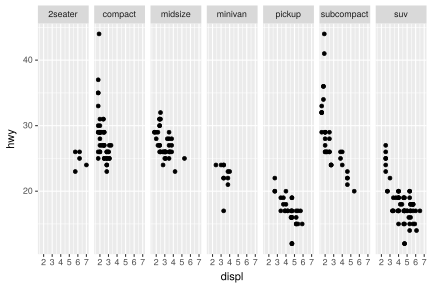

In [52]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(~ class) # No Y

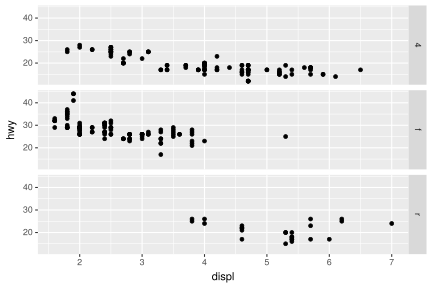

In [53]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ .) # No X

Note the difference between `facet_wrap(~ class)` and `facet_grid(. ~ class)`. The former will wrap a 1d grid over multiple rows whereas the latter will not wrap around. You can control the number of rows in `facet_wrap` using `nrow`. 

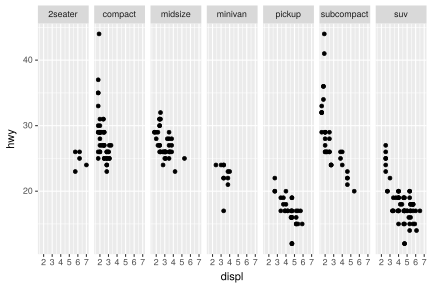

In [60]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 1) # Use only 2 rows